In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 400
%matplotlib inline

import seaborn as sns
sns.set()

from datetime import datetime, timedelta

# Train dataset

In [3]:
train_v1_df = pd.read_csv('train_scala.csv')
train_v2_df = pd.read_csv('train_v2_scala.csv')
test_df = pd.read_csv('sample_submission_v2.csv')

In [4]:
train_v1_df.head()

,msno,is_churn
0,++4RuqBw0Ss6bQU4oMxaRlbBPoWzoEiIZaxPM04Y4+U=,False
1,+/HS8LzrRGXolKbxRzDLqrmwuXqPOYixBIPXkyNcKNI=,False
2,+/namlXq+u3izRjHCFJV4MgqcXcLidZYszVsROOq/y4=,False
3,+0/X9tkmyHyet9X80G6GTrDFHnJqvai8d1ZPhayT0os=,False
4,+09YGn842g6h2EZUXe0VWeC4bBoCbDGfUboitc0vIHw=,False


In [5]:
train_v2_df.head()

,msno,is_churn
0,++4RuqBw0Ss6bQU4oMxaRlbBPoWzoEiIZaxPM04Y4+U=,False
1,+/HS8LzrRGXolKbxRzDLqrmwuXqPOYixBIPXkyNcKNI=,False
2,+/g9O3USecrC8npzaFHXW/2XJ7fB80SineiUoCg7M6o=,False
3,+/namlXq+u3izRjHCFJV4MgqcXcLidZYszVsROOq/y4=,False
4,+0/X9tkmyHyet9X80G6GTrDFHnJqvai8d1ZPhayT0os=,False


In [6]:
test_df.head()

,msno,is_churn
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0


In [7]:
train_v1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879537 entries, 0 to 879536
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   msno      879537 non-null  object
 1   is_churn  879537 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 7.5+ MB


In [8]:
train_v2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886500 entries, 0 to 886499
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   msno      886500 non-null  object
 1   is_churn  886500 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 7.6+ MB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907471 entries, 0 to 907470
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   msno      907471 non-null  object
 1   is_churn  907471 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 13.8+ MB


In [10]:
train_v1_df.msno.duplicated().sum(), \
train_v2_df.msno.duplicated().sum(), \
test_df.msno.duplicated().sum()

(0, 0, 0)

No duplicates of the users.

In [11]:
train_v1_df.isnull().sum(), \
train_v2_df.isnull().sum(), \
test_df.isnull().sum()

(msno        0
 is_churn    0
 dtype: int64,
 msno        0
 is_churn    0
 dtype: int64,
 msno        0
 is_churn    0
 dtype: int64)

No nan values.

In [12]:
train_v1_df.is_churn.value_counts(normalize=True), \
train_v2_df.is_churn.value_counts(normalize=True), \
test_df.is_churn.value_counts(normalize=True)

(False    0.960455
 True     0.039545
 Name: is_churn, dtype: float64,
 False    0.950745
 True     0.049255
 Name: is_churn, dtype: float64,
 0    1.0
 Name: is_churn, dtype: float64)

The datasets are unbalanced: positive churn ~4-5%.

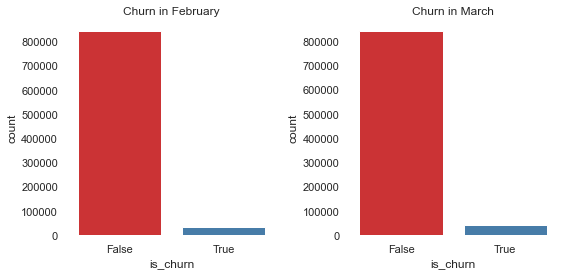

In [13]:
plt.figure(figsize=(8, 4)) 
ax1 = plt.subplot(121, frameon=False)
ax2 = plt.subplot(122, frameon=False)
sns.countplot(x='is_churn', data=train_v1_df, palette='Set1', ax=ax1)
sns.countplot(x='is_churn', data=train_v2_df, palette='Set1', ax=ax2)
ax1.set_title('Churn in February')
ax2.set_title('Churn in March')

plt.tight_layout()

In [14]:
train_v1_df.is_churn = train_v1_df.is_churn.astype('float64')
train_v2_df.is_churn = train_v2_df.is_churn.astype('float64')

In [15]:
import pickle

with open('Data/train_v1_scala_clean.pickle', 'wb') as handle:
    pickle.dump(train_v1_df, handle)
with open('Data/train_v2_scala_clean.pickle', 'wb') as handle:
    pickle.dump(train_v2_df, handle)

# Transactions Dataset

In [16]:
transactions_v1 = pd.read_csv('transactions.csv')
transactions_v2 = pd.read_csv('transactions_v2.csv')
transactions_df = pd.concat([transactions_v1, transactions_v2], ignore_index=True)

In [17]:
transactions_df.duplicated().sum()

3339

In [18]:
transactions_df[transactions_df.duplicated(keep=False) == True].sort_values(by='msno')

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
13833296,++8dXbkKMJ0rXwUc/m19lTVokEl3c9EfRKWmV6qP9jg=,41,30,99,99,1,20160805,20160904,0
20514078,++8dXbkKMJ0rXwUc/m19lTVokEl3c9EfRKWmV6qP9jg=,41,30,99,99,1,20160805,20160904,0
20406589,+20hE3Vvz3NxE18F/MV7RzarD5DWeWefd9zzb+9ejGU=,41,30,99,99,1,20160416,20160515,0
16528928,+20hE3Vvz3NxE18F/MV7RzarD5DWeWefd9zzb+9ejGU=,41,30,99,99,1,20160416,20160515,0
7674675,+5G1snABFXas2LPGl7Q/w1yI83fPR5nc8TDsvwY6W+Q=,41,30,99,99,1,20151026,20151125,0
...,...,...,...,...,...,...,...,...,...
17332797,zwyc3be299vRIR7tYDcFn0a5TpASN0QStGPBAYU0Ibs=,41,30,99,99,1,20161225,20170124,0
4838802,zxQ7B4qVPsle+zoetmMeZoe149Bzc63L1VqMvUIkM+s=,41,30,99,99,1,20161001,20161031,0
6748314,zxQ7B4qVPsle+zoetmMeZoe149Bzc63L1VqMvUIkM+s=,41,30,99,99,1,20161001,20161031,0
5492989,zy1OTzCnxegYltHBw1D1pZ8OH41xuwN+N6a+YMB0pwk=,41,30,99,99,1,20160810,20160909,0


In [19]:
transactions_df = transactions_df.drop_duplicates(keep='first')

In [20]:
transactions_df.info(verbose=True, null_counts=True, memory_usage='deep') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22975416 entries, 0 to 22978754
Data columns (total 9 columns):
 #   Column                  Non-Null Count     Dtype 
---  ------                  --------------     ----- 
 0   msno                    22975416 non-null  object
 1   payment_method_id       22975416 non-null  int64 
 2   payment_plan_days       22975416 non-null  int64 
 3   plan_list_price         22975416 non-null  int64 
 4   actual_amount_paid      22975416 non-null  int64 
 5   is_auto_renew           22975416 non-null  int64 
 6   transaction_date        22975416 non-null  int64 
 7   membership_expire_date  22975416 non-null  int64 
 8   is_cancel               22975416 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 3.7 GB


In [21]:
transactions_df.memory_usage()

Index                     183803328
msno                      183803328
payment_method_id         183803328
payment_plan_days         183803328
plan_list_price           183803328
actual_amount_paid        183803328
is_auto_renew             183803328
transaction_date          183803328
membership_expire_date    183803328
is_cancel                 183803328
dtype: int64

In [22]:
transactions_df.max()

msno                      zzzyOgMk9MljCerbCCYrVtvu85aSCiy7yCMjAEgNYMs=
payment_method_id                                                   41
payment_plan_days                                                  450
plan_list_price                                                   2000
actual_amount_paid                                                2000
is_auto_renew                                                        1
transaction_date                                              20170331
membership_expire_date                                        20361015
is_cancel                                                            1
dtype: object

Let's convert dtype to int16 to reduce memory usage (dates are exempt) - Also, let's add coulmns with dates in datetime type (I will also keep the original column, as it could be useful).   

In [23]:
dtypes_dict = {'payment_method_id':'int16',
               'payment_plan_days':'int16',
               'plan_list_price':'int16',           
               'actual_amount_paid':'int16',        
               'is_auto_renew':'int16',                 
               'is_cancel':'int16'
              }

In [24]:
transactions_df = transactions_df.astype(dtypes_dict)

In [25]:
transactions_df['transaction_date_dt'] = pd.to_datetime(transactions_df['transaction_date'], 
                                                        format='%Y%m%d',
                                                        errors='ignore')    
transactions_df['membership_expire_date_dt'] = pd.to_datetime(transactions_df['membership_expire_date'], 
                                                              format='%Y%m%d',
                                                              errors='ignore')   

In [26]:
transactions_df.memory_usage()

Index                        183803328
msno                         183803328
payment_method_id             45950832
payment_plan_days             45950832
plan_list_price               45950832
actual_amount_paid            45950832
is_auto_renew                 45950832
transaction_date             183803328
membership_expire_date       183803328
is_cancel                     45950832
transaction_date_dt          183803328
membership_expire_date_dt    183803328
dtype: int64

In [27]:
transactions_df.info(verbose=True, null_counts=True, memory_usage='deep') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22975416 entries, 0 to 22978754
Data columns (total 11 columns):
 #   Column                     Non-Null Count     Dtype         
---  ------                     --------------     -----         
 0   msno                       22975416 non-null  object        
 1   payment_method_id          22975416 non-null  int16         
 2   payment_plan_days          22975416 non-null  int16         
 3   plan_list_price            22975416 non-null  int16         
 4   actual_amount_paid         22975416 non-null  int16         
 5   is_auto_renew              22975416 non-null  int16         
 6   transaction_date           22975416 non-null  int64         
 7   membership_expire_date     22975416 non-null  int64         
 8   is_cancel                  22975416 non-null  int16         
 9   transaction_date_dt        22975416 non-null  datetime64[ns]
 10  membership_expire_date_dt  22975416 non-null  datetime64[ns]
dtypes: datetime64[ns](2), 

Cool, we saved 0.4 GB and added two columns.

In [28]:
transactions_df.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,transaction_date_dt,membership_expire_date_dt
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20150930,20151101,0,2015-09-30,2015-11-01
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20150930,20151031,0,2015-09-30,2015-10-31
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,20150930,20160427,0,2015-09-30,2016-04-27
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,20150930,20151128,0,2015-09-30,2015-11-28
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,20150930,20151121,0,2015-09-30,2015-11-21


In [29]:
transactions_df.describe()

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
count,2.297542e+07,2.297542e+07,2.297542e+07,2.297542e+07,2.297542e+07,2.297542e+07,2.297542e+07,2.297542e+07
mean,3.886963e+01,3.349921e+01,1.487280e+02,1.506711e+02,8.477943e-01,2.015828e+07,2.015940e+07,3.879808e-02
std,3.624264e+00,3.985840e+01,1.704627e+02,1.714726e+02,3.592202e-01,6.627929e+03,8.127173e+03,1.931134e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015010e+07,1.970010e+07,0.000000e+00
25%,3.800000e+01,3.000000e+01,9.900000e+01,9.900000e+01,1.000000e+00,2.015092e+07,2.015110e+07,0.000000e+00
50%,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.016041e+07,2.016053e+07,0.000000e+00
75%,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.016102e+07,2.016113e+07,0.000000e+00
max,4.100000e+01,4.500000e+02,2.000000e+03,2.000000e+03,1.000000e+00,2.017033e+07,2.036102e+07,1.000000e+00


In [30]:
transactions_df.msno.nunique()

2426143

In [31]:
transactions_df.sort_values(by='msno')

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,transaction_date_dt,membership_expire_date_dt
6797850,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,35,7,0,0,0,20160909,20160914,0,2016-09-09,2016-09-14
1521480,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,38,410,1788,1788,0,20151121,20170104,0,2015-11-21,2017-01-04
21797460,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,22,395,1599,1599,0,20161023,20180206,0,2016-10-23,2018-02-06
1498592,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,41,30,99,99,1,20161116,20161215,0,2016-11-16,2016-12-15
1914756,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,41,30,99,99,1,20170215,20170315,0,2017-02-15,2017-03-15
...,...,...,...,...,...,...,...,...,...,...,...
21136039,zzzN9thH22os1dRS0VHReY/8FTfGHOi86//d+wGGFsQ=,41,30,99,99,1,20160804,20160904,0,2016-08-04,2016-09-04
11302263,zzzN9thH22os1dRS0VHReY/8FTfGHOi86//d+wGGFsQ=,41,30,99,99,1,20161204,20170104,0,2016-12-04,2017-01-04
13557324,zzzN9thH22os1dRS0VHReY/8FTfGHOi86//d+wGGFsQ=,41,30,99,99,1,20160704,20160804,0,2016-07-04,2016-08-04
13444388,zzztsqkufVj9DPVJDM3FxDkhlbCL5z4aiYxgPSGkIK4=,35,7,0,0,0,20150608,20150615,0,2015-06-08,2015-06-15


As this is a transaction dataset, we have several rows for the same user. In particular there are abut 2.4M unique users in the dataset, which is more than the number of users for which we know the target variable, i.e. 880K for each train dataset (v1 and v2). Let's keep the users for which we know the target only, so we will also reduce memory.

In [32]:
users = set(train_v1_df.msno.tolist() + train_v2_df.msno.tolist())
len(users)

972553

In [33]:
transactions_user_df = transactions_df[transactions_df['msno'].isin(list(users))]
transactions_user_df.msno.nunique()

972553

In [34]:
transactions_user_df['msno'].value_counts()

f/CqixCvjsoTwQRY8A09SMBMsM0cRcG8BSUe48Bd2Mg=    76
xm6fmAfgZx1OYUXaJuHOObD0H2EAtIktv9NYIVlaTf4=    71
mg+IeEqwTD8RIi3MD3InzWbebMVApP/MN3WSCKtw0Tw=    68
WAMleIuG124oDSSdhcZIECwLcHHHbk4or0y6gxkK7t8=    67
mx4FQFskeSNq/VzREXEO4HnxhxIyuZD/CppvjdYcxFw=    66
                                                ..
rzeHdDbp8ePkShgCWdLfPqGcGI76c1FWe2wsSfhECiQ=     1
W/Yn+8YA51VnhI8o62F4wEnWp49qh6tC+ro2FUQ6o5w=     1
Nra2PORifPHvywPwkq2oMoQeKSDK26OKpK9m24Lg1Zw=     1
yRKFZCUtGfCBW6Qg6Ln65l5wqEaej6Ki+4XaVZB8zII=     1
1cnIvnDyZA3nQ8Th5qwpgngC6MpIr3l4xxl/hpztwTM=     1
Name: msno, Length: 972553, dtype: int64

In [35]:
transactions_user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15574568 entries, 1 to 22978753
Data columns (total 11 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   msno                       object        
 1   payment_method_id          int16         
 2   payment_plan_days          int16         
 3   plan_list_price            int16         
 4   actual_amount_paid         int16         
 5   is_auto_renew              int16         
 6   transaction_date           int64         
 7   membership_expire_date     int64         
 8   is_cancel                  int16         
 9   transaction_date_dt        datetime64[ns]
 10  membership_expire_date_dt  datetime64[ns]
dtypes: datetime64[ns](2), int16(6), int64(2), object(1)
memory usage: 891.2+ MB


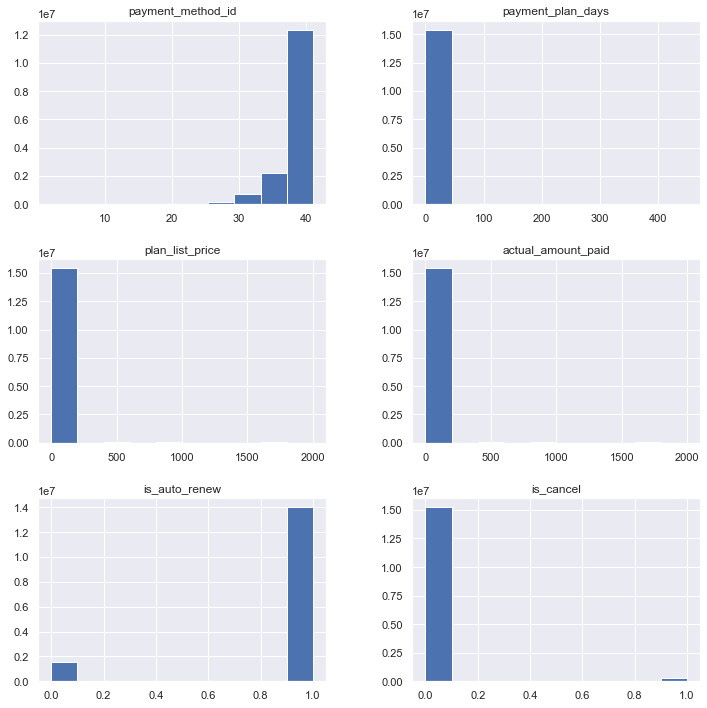

In [36]:
transactions_user_df[['payment_method_id',
                      'payment_plan_days',
                      'plan_list_price',
                      'actual_amount_paid',
                      'is_auto_renew',
                      'is_cancel']].hist(figsize=(10,10))
plt.tight_layout()
plt.subplots_adjust(hspace=.3, wspace=.3);

In [37]:
cols = ['payment_method_id',
        'payment_plan_days',
        'plan_list_price',
        'actual_amount_paid',
        'is_auto_renew',
        'is_cancel']
for col in cols:
    print(f'''
{col}:
{transactions_user_df[col].value_counts()}
    ''')



payment_method_id:
41    9631227
40    1658937
38     935110
37     804773
36     695055
34     654978
33     297937
31     220868
39     145339
30     116167
29     106366
32      60063
27      44597
35      44421
28      36776
23      31659
18      13803
20      12350
19      12282
14      10262
16       8529
22       6068
24       5775
25       4038
15       3098
13       2837
17       2503
26       2114
11       1847
12       1597
21       1578
10       1091
8         243
6         102
5          83
3          77
2          14
4           4
Name: payment_method_id, dtype: int64
    

payment_plan_days:
30     14526879
0        518228
31       328064
7         50793
195       42031
410       29918
180       21450
90        14679
100       10583
120        7421
60         4361
10         4289
395        2543
360        2507
200        2407
1          2100
240        1582
45         1064
400        1060
14          685
450         357
35          273
365         267
70          258
2

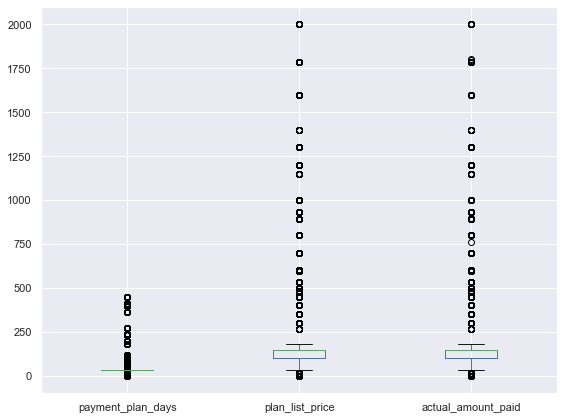

In [38]:
transactions_user_df[['payment_plan_days',
                      'plan_list_price',
                      'actual_amount_paid'
                     ]].plot(kind='box', figsize=(8, 6))
plt.tight_layout()

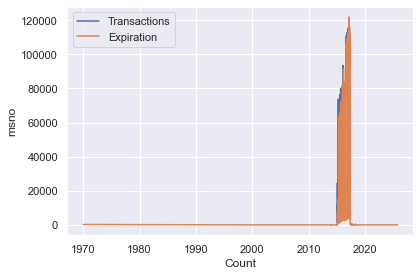

In [39]:
transac_date_count = transactions_user_df.groupby('transaction_date_dt')['msno'].count()
exp_date_count = transactions_user_df.groupby('membership_expire_date_dt')['msno'].count()
sns.lineplot(x=transac_date_count.index, y=transac_date_count, label='Transactions')
sns.lineplot(x=exp_date_count.index, y=exp_date_count, label='Expiration')
plt.xlabel('Year')
plt.xlabel('Count')
plt.tight_layout()

In [40]:
mask = (transactions_df['membership_expire_date_dt'].dt.year >= 2015) \
       & (transactions_df['membership_expire_date_dt'] < datetime(2017, 3, 1))
transactions_user_df = transactions_user_df[mask]

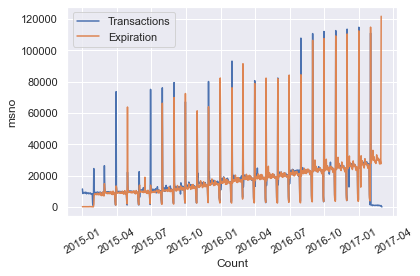

In [41]:
transac_date_count = transactions_user_df.groupby('transaction_date_dt')['msno'].count()
exp_date_count = transactions_user_df.groupby('membership_expire_date_dt')['msno'].count()
sns.lineplot(x=transac_date_count.index, y=transac_date_count, label='Transactions')
sns.lineplot(x=exp_date_count.index, y=exp_date_count, label='Expiration')
plt.xlabel('Year')
plt.xlabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()

In [42]:
with open('Data/transactions_clean.pickle', 'wb') as handle:
    pickle.dump(transactions_user_df, handle)

# User Logs Dataset

In [43]:
user_logs_v1_df = pd.read_csv('user_logs.csv', nrows=5000000)
user_logs_v2_df = pd.read_csv('user_logs_v2.csv', nrows=5000000)
user_logs_df = pd.concat([user_logs_v1_df, user_logs_v2_df], ignore_index=True)

In [44]:
user_logs_df.duplicated().sum()

0

There are no duplicates in this subsample of the logs dataset, to be checked again when including the entire dataset.

In [45]:
user_logs_df.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,20150513,0,0,0,0,1,1,280.335
1,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,20150709,9,1,0,0,7,11,1658.948
2,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150105,3,3,0,0,68,36,17364.956
3,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150306,1,0,1,1,97,27,24667.317
4,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150501,3,0,0,0,38,38,9649.029


In [46]:
user_logs_df.shape

(10000000, 9)

In [47]:
user_logs_df.info(verbose=True, null_counts=True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 9 columns):
 #   Column      Non-Null Count     Dtype  
---  ------      --------------     -----  
 0   msno        10000000 non-null  object 
 1   date        10000000 non-null  int64  
 2   num_25      10000000 non-null  int64  
 3   num_50      10000000 non-null  int64  
 4   num_75      10000000 non-null  int64  
 5   num_985     10000000 non-null  int64  
 6   num_100     10000000 non-null  int64  
 7   num_unq     10000000 non-null  int64  
 8   total_secs  10000000 non-null  float64
dtypes: float64(1), int64(7), object(1)
memory usage: 1.5 GB


In [48]:
user_logs_df['date_dt'] = pd.to_datetime(user_logs_df.date, 
                                         format='%Y%m%d', 
                                         errors='ignore')

In [49]:
user_logs_df.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,date_dt
0,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,20150513,0,0,0,0,1,1,280.335,2015-05-13
1,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,20150709,9,1,0,0,7,11,1658.948,2015-07-09
2,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150105,3,3,0,0,68,36,17364.956,2015-01-05
3,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150306,1,0,1,1,97,27,24667.317,2015-03-06
4,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150501,3,0,0,0,38,38,9649.029,2015-05-01


In [50]:
user_logs_df.describe()

,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,2.016385e+07,6.347179e+00,1.575115e+00,9.790065e-01,1.104493e+00,3.051742e+01,2.958255e+01,-7.553942e+11
std,7.802665e+03,1.374924e+01,4.112909e+00,2.051987e+00,3.252344e+00,4.168863e+01,3.302750e+01,8.356869e+13
min,2.015010e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-9.223372e+15
25%,2.016031e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,8.000000e+00,1.926887e+03
50%,2.017026e+07,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01,1.900000e+01,4.606630e+03
75%,2.017032e+07,7.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,3.800000e+01,3.900000e+01,1.005092e+04
max,2.017033e+07,4.312000e+03,8.620000e+02,4.700000e+02,1.515000e+03,1.946200e+04,3.547000e+03,9.223372e+15


In [51]:
user_logs_df.msno.nunique()

1443096

In [52]:
user_logs_df.sort_values(by='msno')

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,date_dt
391983,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,20160910,1,0,1,1,10,10,2998.267,2016-09-10
8779926,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,20170308,0,1,0,0,6,6,1632.781,2017-03-08
5830225,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,20170319,1,1,0,0,2,4,589.959,2017-03-19
6028159,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,20170310,3,0,0,0,3,6,832.030,2017-03-10
5480071,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,20170331,2,1,1,0,11,15,2823.625,2017-03-31
...,...,...,...,...,...,...,...,...,...,...
954767,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,20160714,4,1,2,1,8,16,2125.260,2016-07-14
5556746,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,20170305,4,0,0,0,20,10,4844.580,2017-03-05
8845804,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,20170321,0,0,0,0,34,33,8764.685,2017-03-21
969428,zzztPAN9xjMytpZ0RN2gU9mScDULJnHQZK8eZb4uELU=,20150110,3,1,1,1,0,4,509.706,2015-01-10


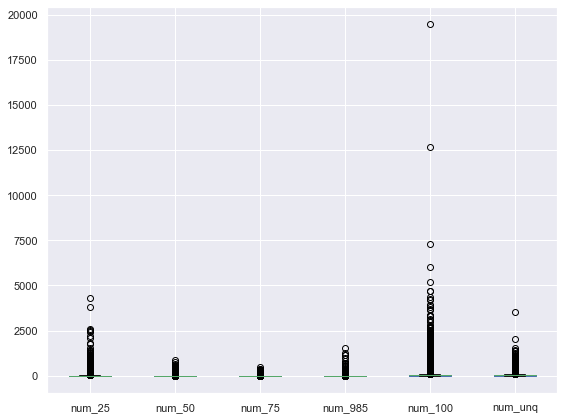

In [53]:
user_logs_df.drop(['date', 'total_secs'], axis=1).plot(kind='box', figsize=(8,6))
plt.tight_layout()
plt.subplots_adjust(hspace=.3, wspace=.3);

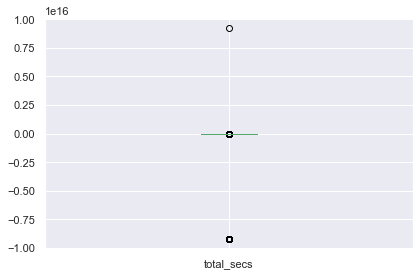

In [54]:
user_logs_df['total_secs'].plot(kind='box', figsize=(6,4))
plt.tight_layout()
plt.subplots_adjust(hspace=.3, wspace=.3); 

Structure of dataset is similar to transactions. The distributions are extremely skewed, and total_secs contain negativa vales. This quick analysis is on only a small fraction of the dataset. The complete dataset is > 30 GB, I will need to work something out to handle this on my Desktop. More wrangling later when I load the whole dataset.

# Members Dataset

Note: the file 'members.csv' is no longer available - It was removed due to data leakage. 'members_v3.csv' is the dataset to use.

In [55]:
members_df = pd.read_csv('members_v3.csv')
members_df.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [56]:
members_df.info(verbose=True, null_counts=True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   msno                    6769473 non-null  object
 1   city                    6769473 non-null  int64 
 2   bd                      6769473 non-null  int64 
 3   gender                  2339968 non-null  object
 4   registered_via          6769473 non-null  int64 
 5   registration_init_time  6769473 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.1 GB


In [57]:
members_df.duplicated().sum()

0

In [58]:
members_df['registration_init_time_dt'] = pd.to_datetime(members_df['registration_init_time'], 
                                                         format='%Y%m%d',
                                                         errors='ignore')    

In [59]:
members_df['registration_init_time_dt'].isnull().any()

False

In [60]:
members_df.describe()

,city,bd,registered_via,registration_init_time
count,6.769473e+06,6.769473e+06,6.769473e+06,6.769473e+06
mean,3.847358e+00,9.795794e+00,5.253069e+00,2.014518e+07
std,5.478359e+00,1.792590e+01,2.361398e+00,2.318601e+04
min,1.000000e+00,-7.168000e+03,-1.000000e+00,2.004033e+07
25%,1.000000e+00,0.000000e+00,4.000000e+00,2.014042e+07
50%,1.000000e+00,0.000000e+00,4.000000e+00,2.015101e+07
75%,4.000000e+00,2.100000e+01,7.000000e+00,2.016060e+07
max,2.200000e+01,2.016000e+03,1.900000e+01,2.017043e+07


In [61]:
members_df.isnull().sum()

msno                               0
city                               0
bd                                 0
gender                       4429505
registered_via                     0
registration_init_time             0
registration_init_time_dt          0
dtype: int64

In [62]:
members_df['gender'].fillna('missing', inplace=True)

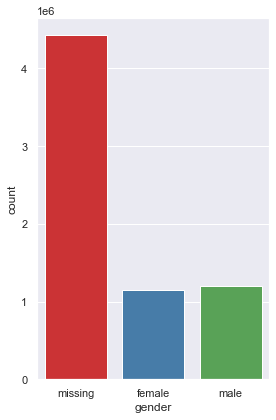

In [63]:
plt.figure(figsize=(4,6))
sns.countplot(x='gender', data=members_df, palette='Set1')
plt.tight_layout()

In [64]:
members_df.info(verbose=True, null_counts=True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 7 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   msno                       6769473 non-null  object        
 1   city                       6769473 non-null  int64         
 2   bd                         6769473 non-null  int64         
 3   gender                     6769473 non-null  object        
 4   registered_via             6769473 non-null  int64         
 5   registration_init_time     6769473 non-null  int64         
 6   registration_init_time_dt  6769473 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 1.3 GB


### Remove obvious outliers

In [65]:
members_df.loc[(members_df['bd']<=0) | (members_df['bd']>=100), 'bd'] = np.nan

In [66]:
members_df.describe()

,city,bd,registered_via,registration_init_time
count,6.769473e+06,2.223464e+06,6.769473e+06,6.769473e+06
mean,3.847358e+00,2.948319e+01,5.253069e+00,2.014518e+07
std,5.478359e+00,1.052334e+01,2.361398e+00,2.318601e+04
min,1.000000e+00,1.000000e+00,-1.000000e+00,2.004033e+07
25%,1.000000e+00,2.200000e+01,4.000000e+00,2.014042e+07
50%,1.000000e+00,2.700000e+01,4.000000e+00,2.015101e+07
75%,4.000000e+00,3.500000e+01,7.000000e+00,2.016060e+07
max,2.200000e+01,9.900000e+01,1.900000e+01,2.017043e+07


In [67]:
members_df.msno.nunique()

6769473

In [68]:
members_user_df = members_df[members_df['msno'].isin(list(users))]
members_user_df.msno.nunique()

857038

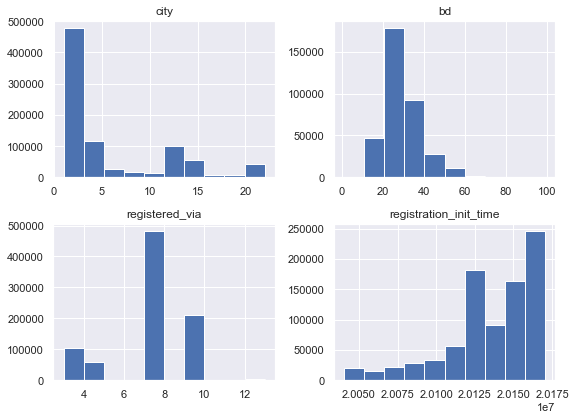

In [69]:
members_user_df.hist(figsize=(8,6))
plt.tight_layout();

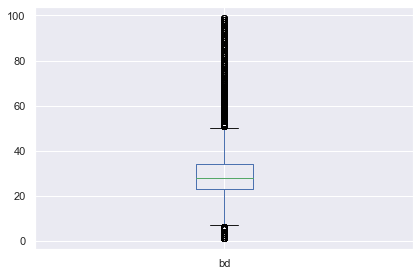

In [70]:
members_user_df['bd'].plot(kind='box', figsize=(6, 4))
plt.tight_layout();

In [71]:
with open('Data/members_clean.pickle', 'wb') as handle:
    pickle.dump(members_user_df, handle)